# What to expect

In notebook 2B we looked at the output of STAR, and combined the results for each sample in the <i>Schistosoma mansoni</i> example dataset into a single dataframe. We considered ways to normalize the gene count data and viewed the results using  Principle Components Analysis. In this second part of this session, you will repeat most of this process for your choice of dataset.

### The datasets
The following two datasets are available. Click on the links to find out more about each one:
1. *Plasmodium*
2. *Trypanasoma*

In [1]:
# Which dataset are you considering?
dataset = "Plasmodium"

# Inspect STAR results
As before, take a look at the `analysis/<dataset>/multiqc/multiqc_report.html` by double-clicking:

<div class="alert alert-block alert-warning">
Questions:
    
1. What percentage of reads aligned to the reference (provide a range)? How does this compare to the example?
2. What percentage of reads mapped exactly once in each sample? Does this look reasonable?
3. Are there any samples which look less good? In what way?

<div class="alert alert-block alert-success">
Answers:
    
1. 39.9-91.1%? This covers a bigger range than the example, but most of the percentages are higher than in the example
2. Same percentages as for (1)
3. 820LT-1_S1 and 820LT-1_S2 are much worse in terms of the percentage mapping. All have a good number of reads

# Strandedness
Choose an accession and take a look at `analysis/<dataset>/star/<accession>/<accession>ReadsPerGene.out.tab`. 

<div class="alert alert-block alert-warning">
Question:
    
4. Do you think this library was stranded, reverse stranded or unstranded?


In [2]:
! head -n 30 analysis/Plasmodium/star/820LT-1_S1/820LT-1_S1ReadsPerGene.out.tab

N_unmapped	22412362	22412362	22412362
N_multimapping	1123395	1123395	1123395
N_noFeature	3706755	17231923	17525264
N_ambiguous	18415	4995	4945
PBANKA_0000101	0	1	0
PBANKA_0000201	0	0	0
PBANKA_0000301	7	3	4
PBANKA_0000401	11	13	7
PBANKA_0000600	37	20	17
PBANKA_0000701	2	0	2
PBANKA_0000801	2	2	0
PBANKA_0000901	14	7	17
PBANKA_0001001	175	77	98
PBANKA_0001101	0	0	0
PBANKA_0001200	2	0	2
PBANKA_0001201	18	5	13
PBANKA_0001301	8	3	5
PBANKA_0001401	12	5	7
PBANKA_0001501	0	0	0
PBANKA_0001601	1	1	0
PBANKA_0006300	48	24	24
PBANKA_0006401	0	0	0
PBANKA_0006501	0	0	0
PBANKA_0006600	0	0	0
PBANKA_0006701	0	0	0
PBANKA_0006800	0	0	0
PBANKA_0006900	0	0	0
PBANKA_0007000	0	0	0
PBANKA_0007100	0	0	0
PBANKA_0007200	0	0	0


<div class="alert alert-block alert-success">
Answer:
    
4. Unstranded


# Combining data accross samples
To ensure you have the correct results going forwards we have already combined the outputs for this dataset into `analysis/<dataset>/star/ReadsPerGene.csv`. Use pandas to load the dataframe and take a look at it.

In [3]:
import pandas as pd

df = pd.read_csv(f"analysis/{dataset}/star/ReadsPerGene.csv", index_col=0)

In [4]:
df

,260Sch-1_S13,260Sch-2_S14,260Sch-3_S15,820LT-1_S1,820LT-2_S2,820LT-3_S3,820Sch-1_S10,820Sch-2_S11,820Sch-3_S12,G260-1_S4,G260-2_S5,G260-3_S6,G260sch-1-23468787,G260sch-2-23468788,G260sch-3-23468793
gene,,,,,,,,,,,,,,,
PBANKA_0000101,0,0,0,0,0,1,2,1,0,0,0,1,2,2,3
PBANKA_0000201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PBANKA_0000301,2,1,1,7,6,14,8,11,14,0,4,2,5,9,1
PBANKA_0000401,12,7,12,11,1,9,48,58,41,11,14,9,103,43,52
PBANKA_0000600,6,5,12,37,11,39,20,21,19,9,11,15,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBANKA_MIT03300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PBANKA_MIT03400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PBANKA_MIT03500,2094,1885,2066,1762,2636,1744,7960,11520,8453,795,408,507,958,957,1231


# Normalization with DESeq2

As with the example dataset, we will load this dataset into a DeseqDataSet and use DESeq2 to normalize the counts. For each dataset we have provided metadata in `data/<dataset>/metadata.csv`. First use pandas to load the metadata and have a look. 

In [5]:
metadata = pd.read_csv(f"data/{dataset}/metadata.csv", index_col=0)
counts = df.T

In [6]:
metadata

,condition,category,timepoint
accession,,,
260Sch-1_S13,Alba3 knock out,Alba3 knock out 22-24 hours post invasion,24
260Sch-2_S14,Alba3 knock out,Alba3 knock out 22-24 hours post invasion,24
260Sch-3_S15,Alba3 knock out,Alba3 knock out 22-24 hours post invasion,24
820LT-1_S1,wildtype,wildtype 16hrs post invasion,16
820LT-2_S2,wildtype,wildtype 16hrs post invasion,16
820LT-3_S3,wildtype,wildtype 16hrs post invasion,16
820Sch-1_S10,wildtype,wildtype 22-24 hrs post invasion,24
820Sch-2_S11,wildtype,wildtype 22-24 hrs post invasion,24
820Sch-3_S12,wildtype,wildtype 22-24 hrs post invasion,24


For *Plasmodium*, we want to compare the wildtype at the different timepoints. For *Trypanosoma*, we want to compare *Trypanosoma brucei brucei* stages with different morphologies. Filter the datasets to contain just these samples. 

In [7]:
counts_s = counts[metadata["condition"].isin(["wildtype"])]
metadata_s = metadata[metadata["condition"].isin(["wildtype"])]

Generate a DeseqDataSet object for your analysis thinking about what to pass in to the `design factors` parameter.

In [14]:
from pydeseq2.dds import DeseqDataSet
import scanpy as sc

dds = DeseqDataSet(
    counts=counts_s,
    metadata=metadata_s,
    refit_cooks=True,
    design_factors="timepoint"
)

dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.89 seconds.

Fitting dispersion trend curve...
... done in 0.14 seconds.

Fitting MAP dispersions...
... done in 1.00 seconds.

Fitting LFCs...
... done in 0.46 seconds.

Calculating cook's distance...
... done in 0.00 seconds.

Replacing 0 outlier genes.



In [ ]:
# View the normed counts using the following
dds.layers['normed_counts']

# PCA Plot

Now take a look at how the overall data looks on a Principle Components Analysis plot of PC1 and PC2. Plot the loadings associated these components.

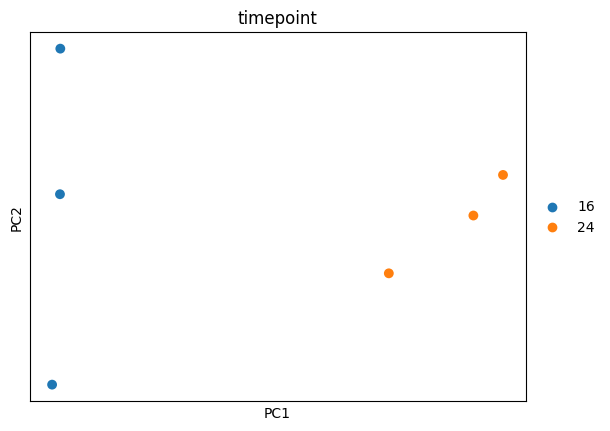

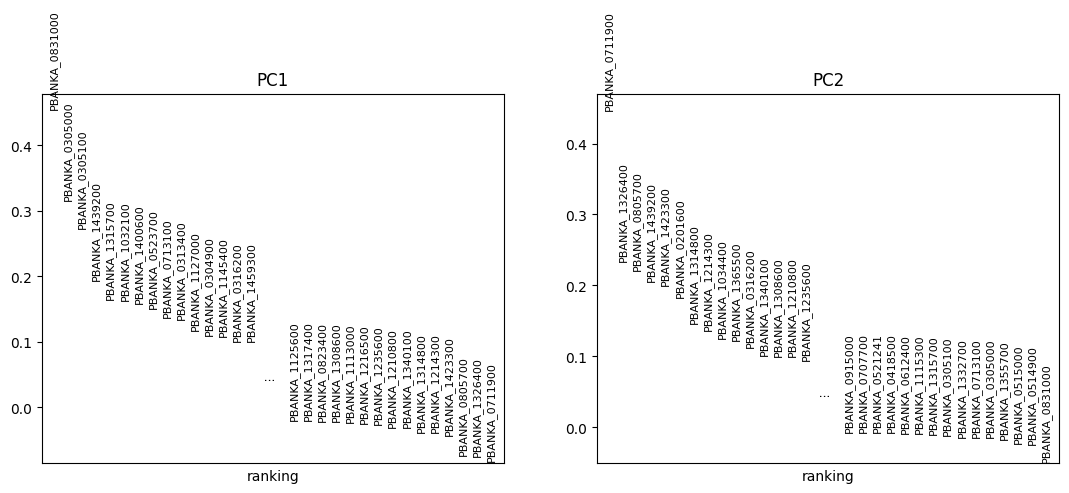

In [15]:
sc.tl.pca(dds)
sc.pl.pca(dds, color="timepoint", size=200)
sc.pl.pca_loadings(dds, components = '1,2')

<div class="alert alert-block alert-warning">

Questions:

5. Is there a separation between the groups?
6. What is PC1 separating?
7. What is PC2 separating?
8. Which 5 genes contribute most to PC1. Which 2 contribute most to PC2?

<div class="alert alert-block alert-success">
Answer:
    
5. Yes, PC1 separates the time points
6. The time points
7. PC2 shows a bigger spread accross time point 16 than time point 24
8. PC1: PBANKA_0831000, PBANKA_0305000, PBANKA_0305100, PBANKA_1439200, PBANKA_1315700
   PC2: PBANKA_0711900, PBANKA_1326400
